In [23]:
%matplotlib inline 

import pandas as pd 
import numpy as np 
import matplotlib as plt
 
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')



In [4]:
import bokeh.charts as bc
import bokeh.plotting as bk

In [11]:
fig = (df.assign(xy = df.x / df.y)
         .sample(n=500)
         .pipe(bc.Scatter, "xy", "price"))
bk.show(fig)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


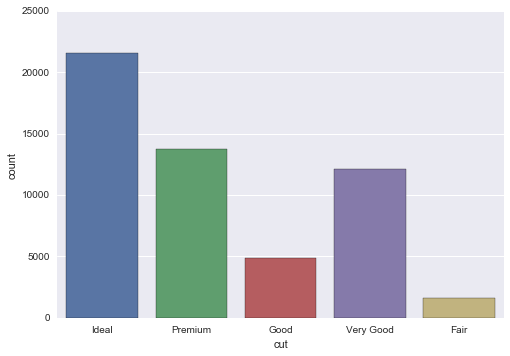

In [13]:
import seaborn as sns 

sns.countplot(x='cut', data=df)
sns.despine()

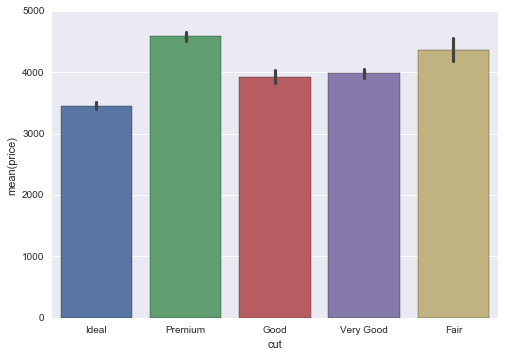

In [14]:
sns.barplot(x='cut', y='price', data=df)
sns.despine()

### Bivariate Relationship 

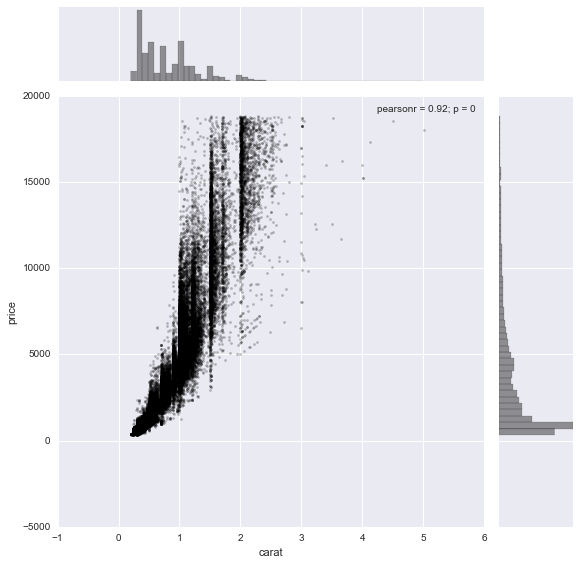

In [15]:
sns.jointplot(x='carat', y='price', data=df, size=8, alpha=.25,
              color='k', marker='.')

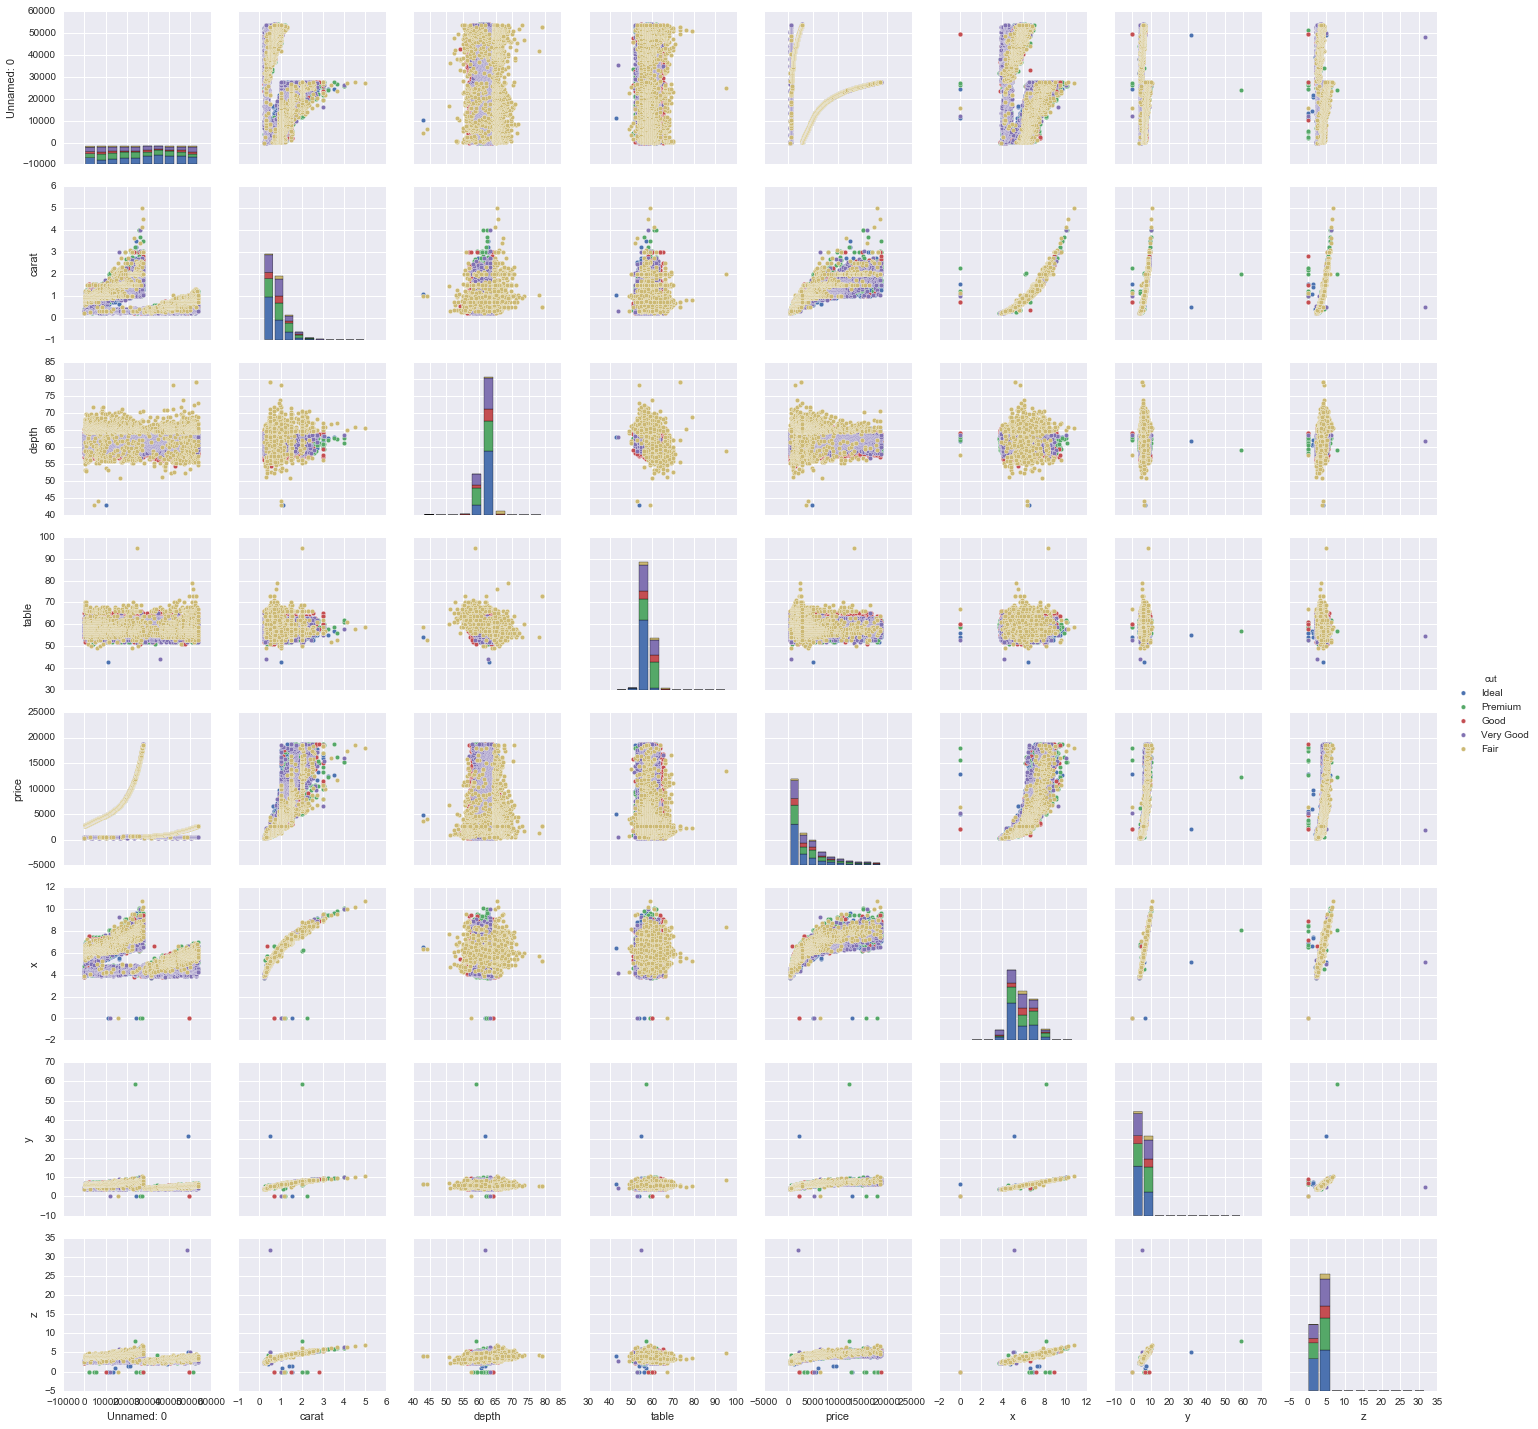

In [18]:
g = sns.pairplot(df, hue='cut')

In [ ]:
import numpy as np 

def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
)

